<a href="https://colab.research.google.com/github/malinphy/q_17/blob/main/umap_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install umap-learn -q
# !pip install hdbscan -q
!pip install umap-learn[plot] -q
import numpy as np
import umap
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.manifold import TSNE

In [3]:
vector_dir = 'drive/MyDrive/BBC_content_vectors.npy'
embedding_vectors = np.load(vector_dir)
print((embedding_vectors).shape)

(15468, 1536)


In [4]:
# umap_embeddings = (umap.UMAP().fit_transform(embedding_vectors))

# pca = decomposition.PCA(n_components=2)
# pca.fit(embedding_vectors)
# pca_embs = pca.transform(embedding_vectors)

# tsne_ = TSNE(n_components=2)
# tsne_.fit(embedding_vectors)
# tsne_embs = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(embedding_vectors)

In [5]:
# plt.figure(figsize = (15,6))
# plt.subplot(1,3,1)
# plt.scatter(umap_embeddings[:,0],umap_embeddings[:,1])
# plt.title('UMAP')

# plt.subplot(1,3,2)
# plt.title('PCA')
# plt.scatter(pca_embs[:,0],pca_embs[:,1])

# plt.subplot(1,3,3)
# plt.scatter(tsne_embs[:,0],tsne_embs[:,1])
# plt.title('t-SNE')

  0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.8/dist-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


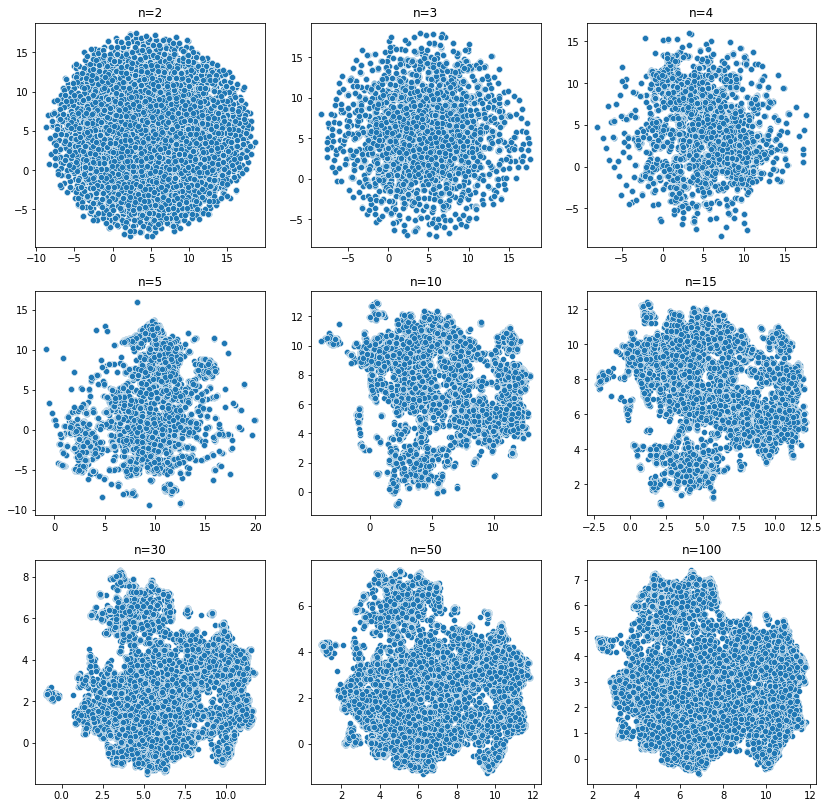

In [6]:
from tqdm.auto import tqdm
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 10, 15, 30, 50, 100]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors)
    u = fit.fit_transform(embedding_vectors);
    sns.scatterplot(x=u[:,0], y=u[:,1], ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

  0%|          | 0/9 [00:00<?, ?it/s]

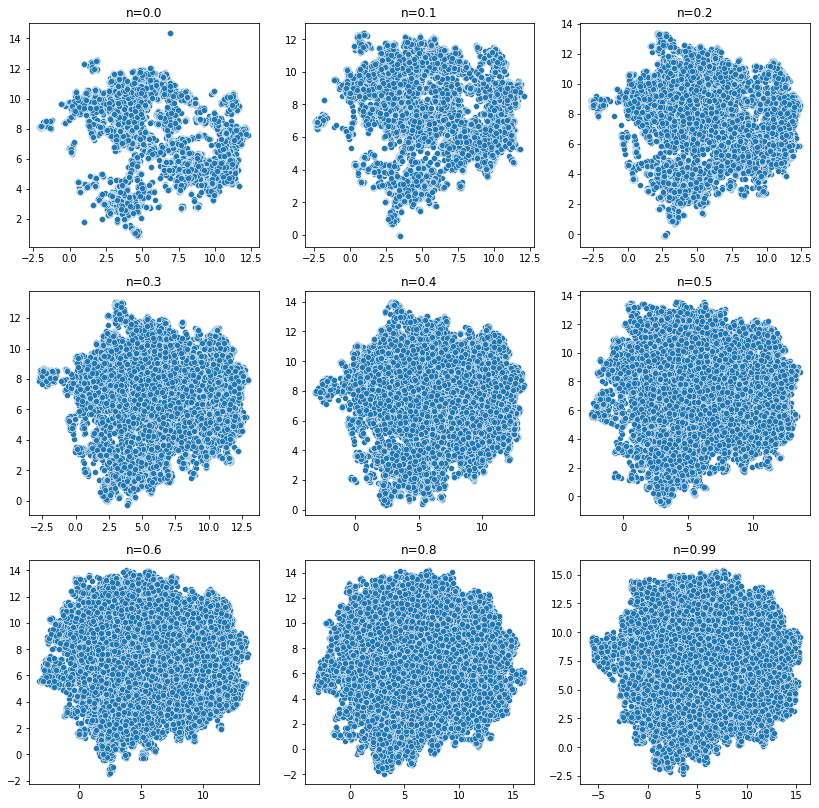

In [12]:
fig, ax = plt.subplots(3,3 , figsize=(14, 14))
ss = [0.0, 0.1, 0.2,0.3, 0.4,0.5,0.6, 0.8, 0.99] ## sample size
i, j = 0, 0
for min_dist in tqdm(ss):
    fit = umap.UMAP(min_dist=min_dist)
    u = fit.fit_transform(embedding_vectors);
    sns.scatterplot(x=u[:,0], y=u[:,1], ax=ax[j, i])
    ax[j, i].set_title(f'n={min_dist}')
    if i < 2: i += 1
    else: i = 0; j += 1